In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
#print input_img
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu' )(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Tensor("dense_10/Sigmoid:0", shape=(?, 784), dtype=float32)


In [15]:
encoder=Model(input_img, encoded)
encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))

In [16]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
from keras.datasets import mnist 
(x_trainO,_),(x_testO,_)=mnist.load_data()
import numpy as np

In [58]:
x_train=x_trainO.reshape(len(x_train),np.prod(x_train.shape[1:]))
x_test=x_testO.reshape(len(x_test),np.prod(x_train.shape[1:]))
x_test[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253,
       253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  1

In [59]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
print x_test.shape
print x_train.shape

(10000, 784)
(60000, 784)


In [60]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.4256 - val_loss: 0.1611
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.1553 - val_loss: 0.1485
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1468 - val_loss: 0.1424
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.1419 - val_loss: 0.1382
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.1382 - val_loss: 0.1349
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.1351 - val_loss: 0.1320
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.1324 - val_loss: 0.1295
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.1301 - val_loss: 0.1273
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.1280 - val_loss: 0.1253
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.1261 - val_loss: 0.1235

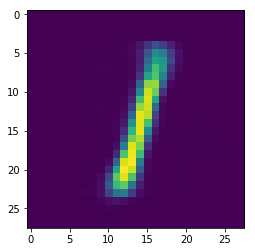

In [62]:
enc_imgs=encoder.predict(x_test)
dec_imgs=decoder.predict(enc_imgs)
#img=dec_imgs[2].reshape(28,28)
#xtest=x_test[2].reshape(28,28)


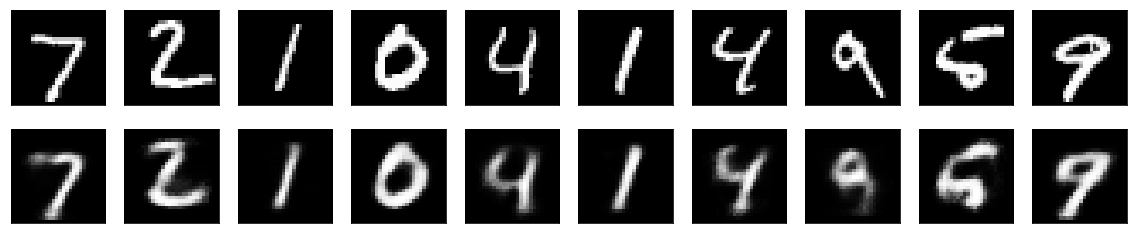

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
n=10
for i in range(n):
    ax=plt.subplot(2, n, i+1)
    xtest=x_test[i].reshape(28,28)
    plt.imshow(xtest)
#    plt.gray()
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)        
    ax1=plt.subplot(2, n, n+i+1)    
    img=dec_imgs[i].reshape(28,28)
    plt.imshow(img)    
#    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
plt.show()